Experiment in Zoubin Ghahramani and Hinton's "Variational learning for SSSM" is implemented.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rsssm import robustSSSM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
A = {0:np.array([0.99]), 1:np.array([0.9])}
B = {0:np.array([1.]), 1:np.array([1.])}
K,S,O = 2, 1, 1
pi_m = {0:np.array([0.]), 1:np.array([0.])}
pi_s = {0:np.eye(S)*0.1, 1:np.eye(S)*0.1}
E_h = {0:np.eye(S)*1., 1:np.eye(S)*10.}
E_o = {0:0.1, 1:0.1}

In [3]:
D = np.zeros((K,K))
p0 = np.ones(K)/K
for i in range(K):
    for j in range(K):
        if i == j:
            D[i,j] = 20.0
        else:
            D[i,j] = 1.0

In [4]:
sssm = robustSSSM(D,p0,A,B,pi_m,pi_s,K,S,O,E_h,E_o,250)

In [5]:
d_states,c_states,observations = sssm.generate_data(250)

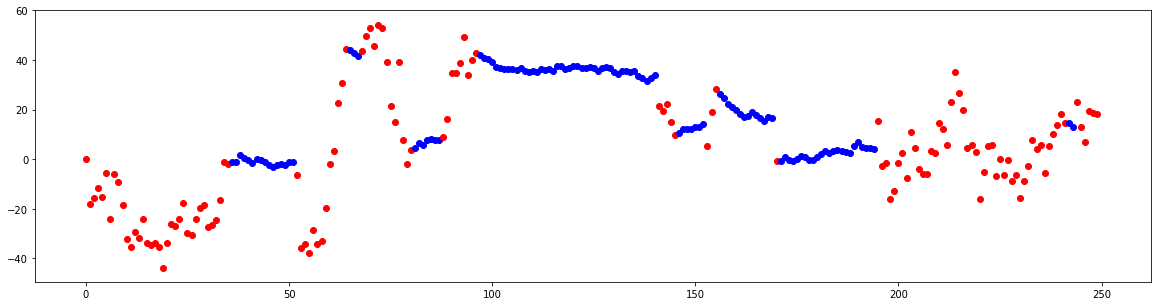

In [6]:
plt.figure(figsize=(20,5))
time = 0
for obs in observations:
    plt.scatter(time, obs[0], color=["blue","red","black"][d_states[time]])
    time += 1

In [7]:
h, H ,gamma = sssm.structured_vi(observations,num_iterations=80)

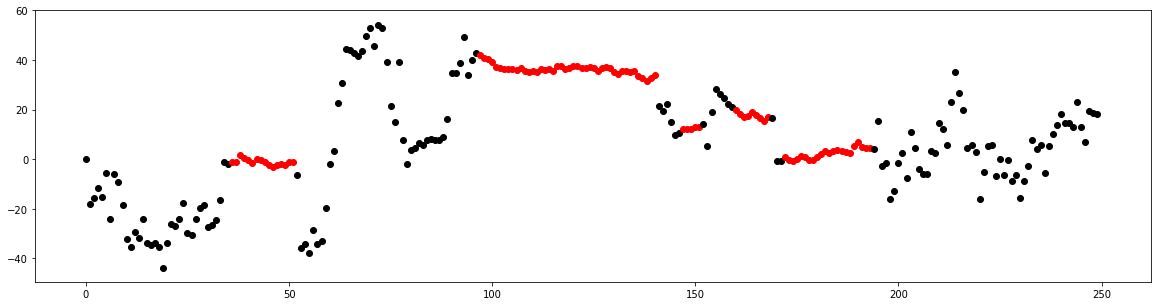

In [8]:
plt.figure(figsize=(20,5))
time = 0
for obs in observations:
    plt.scatter(time, obs[0], color=["red","black"][np.argmax(gamma[:,time])])
    time += 1

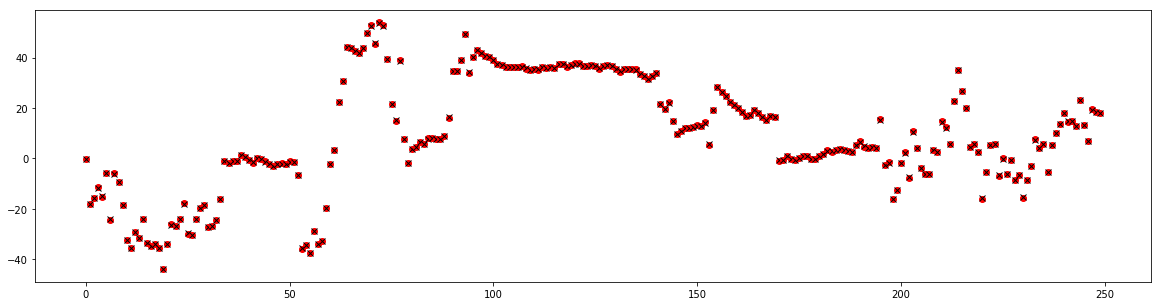

In [9]:
plt.figure(figsize=(20,5))
for i in range(len(observations)):
    plt.plot(i,observations[i][0],'ro')
    plt.plot(i,h[i][0],'kx')
plt.show()

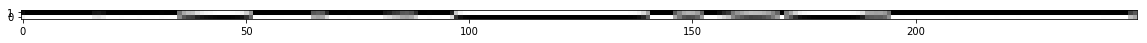

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(gamma, interpolation='nearest', cmap='gray_r')
#plt.axis([0,250,10,0])
plt.gca().invert_yaxis()
plt.show()

In [11]:
D, A, B, pi_m, pi_s, E_h, E_o, h_list, H_list, gamma_new = sssm.VEM(observations,estimate=['M','A','B','pi_d','pi_m','pi_s'],num_iterations_VEM=50,num_iterations_SVI=40)

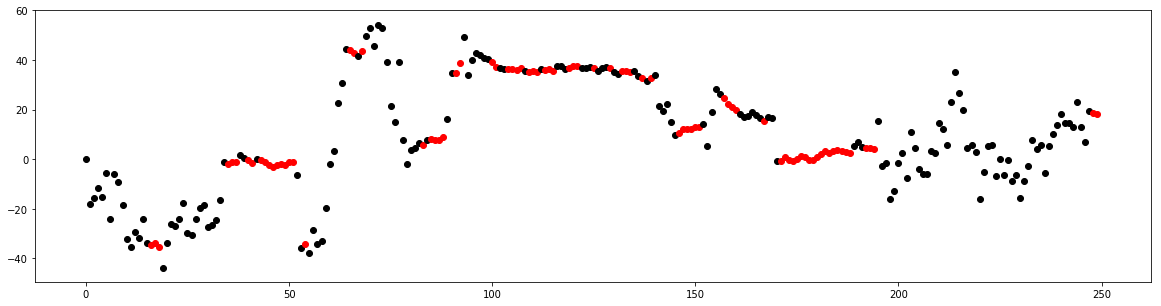

In [12]:
plt.figure(figsize=(20,5))
time = 0
for obs in observations:
    plt.scatter(time, obs[0], color=["red","black"][np.argmax(gamma_new[:,time])])
    time += 1

In [13]:
A

{0: array([[1.03238857]]), 1: array([[0.92835256]])}

In [14]:
B

{0: array([[0.71321601]]), 1: array([[0.76045347]])}

In [15]:
D

array([[51.33674996, 19.47472016],
       [ 8.12485607, 62.99362754]])

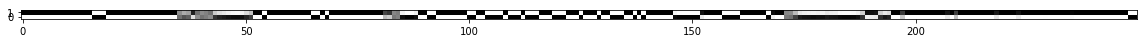

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(gamma_new, interpolation='nearest', cmap='gray_r')
#plt.axis([0,250,10,0])
plt.gca().invert_yaxis()
plt.show()

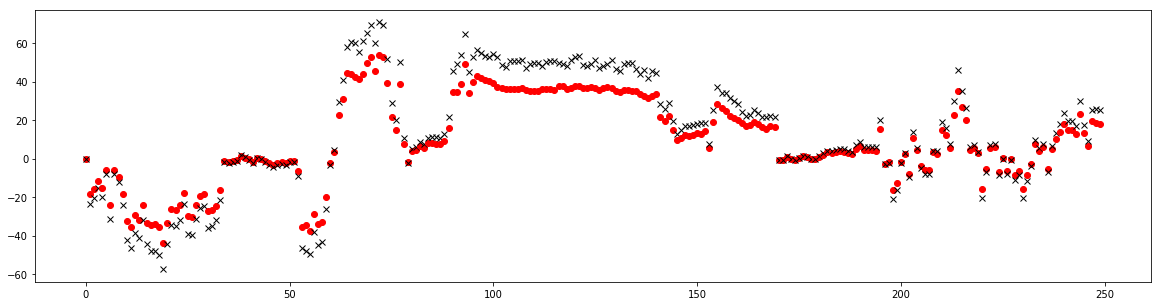

In [17]:
plt.figure(figsize=(20,5))
for i in range(len(observations)):
    plt.plot(i,observations[i][0],'ro')
    plt.plot(i,h_list[i][0],'kx')
plt.show()